## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
df.head()
df.shape

(1893, 8)

In [2]:
# Checking the number of mice.
df['Mouse ID'].value_counts()

g989    13
a401    10
m550    10
a203    10
l725    10
        ..
b447     1
v199     1
n482     1
u153     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
index_df = df.set_index('Mouse ID')
index_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = index_df.drop(['g989'])
# Checked that the rows have decreased by 13 (the number of rows for mouse 'g989')
clean_df.shape

(1880, 7)

In [5]:
# Created a dataframe that reset the index 'Mouse ID' as a column just in case we need it later.
clean_df2 = clean_df.reset_index()
# Checking the number of mice in the clean DataFrame.
clean_df2['Mouse ID'].value_counts()

a401    10
m601    10
k210    10
a203    10
l725    10
        ..
b447     1
t573     1
x336     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [6]:
type(clean_df2)

pandas.core.frame.DataFrame

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = clean_df2.groupby(['Drug Regimen'])
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = tumor['Tumor Volume (mm3)'].mean()
tumor_med = tumor['Tumor Volume (mm3)'].median()
tumor_var = tumor['Tumor Volume (mm3)'].var()
tumor_std = tumor['Tumor Volume (mm3)'].std()
tumor_sem = tumor['Tumor Volume (mm3)'].sem()

tumor_df = pd.DataFrame({
                        "Mean": tumor_mean,
                        "Median" : tumor_med,
                        "Variance" : tumor_var,
                        "Standard Deviation" : tumor_std,
                        "SEM" : tumor_sem
                        })
tumor_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor2 = clean_df2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# tumor['Mouse ID'].count()

# grouped_df = tumor.agg({"Mouse ID": "nunique"})
# grouped_df



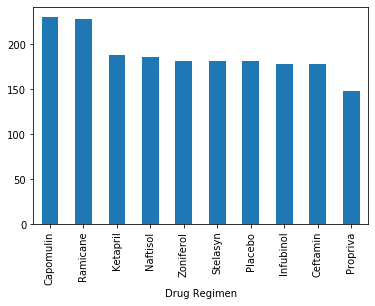

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
timepoint = clean_df2.groupby(['Drug Regimen'])['Timepoint'].count()
timepoint
timepoint.sort_values(ascending=False).plot.bar()
plt.show()

In [11]:
type(timepoint)

pandas.core.series.Series

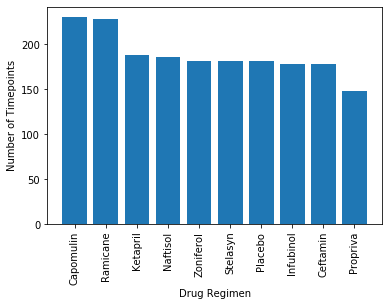

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
timepoint_desc = timepoint.sort_values(ascending=False)
plt.bar(timepoint_desc.index, timepoint_desc.values)
plt.ylabel('Number of Timepoints', size=10)
plt.xlabel('Drug Regimen')
plt.xticks(rotation='vertical') # this is to rotate the x values
plt.show()

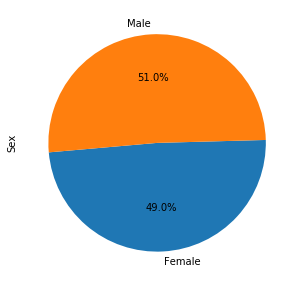

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex = clean_df2.groupby(['Sex'])['Sex'].count()
sex
sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))

In [14]:
sex_df = pd.DataFrame(sex)
sex_df

,Sex
Sex,
Female,922
Male,958


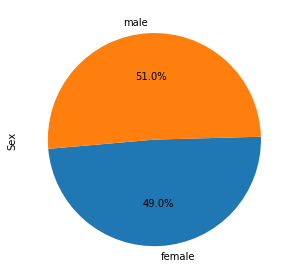

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# last_tm_df


In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tm = clean_df2.groupby(['Mouse ID'])['Timepoint'].max()
last_tm_df = pd.DataFrame(last_tm)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(clean_df2, last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [57]:
# if last_df.loc[245, 'Drug Regimen']:
#     print(last_df.loc[245, 'Tumor Volume (mm3)'])
# last_df

In [58]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_cap,
                       treatments[1]: tumor_ram,
                       treatments[2]: tumor_inf,
                       treatments[3]: tumor_cef
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [59]:
    # Determine outliers using upper and lower bounds
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)

outliers = pd.DataFrame({'Drug': treatments,
                        'Upper Bound': [up_cap, up_ram, up_inf, up_cef],
                        'Lower Bound': [low_cap, low_ram, low_inf, low_cef]
                        })
outliers

,Drug,Upper Bound,Lower Bound
0,Capomulin,40.159220,32.377357
1,Ramicane,40.659006,31.560470
2,Infubinol,65.525743,54.048608
3,Ceftamin,64.299830,48.722078


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
